# Kalorimetrie Laborversuch

Author: Nilay Kuslugil

Datum: 11.12.23

Gruppe: 48

## Forschungsfrage

Inwiefern beeinflusst die Art des Materials Wärme zu speichern bei Versuchen/Experimenten?

## Versuchsaufbau und Durchführung

Wir haben einen Becherglas mit destillieretem Wasser, der mit 3 Temperatursensoren ausgestattet ist und einem Magnetrührer. Dann einen weiteren Topf mit Wasser, das durch einen Tauchsieder erhitzt wird (80 Grad). Die drei verschiedenen Proben werden ins heiße Wasserbad reingelegt und werden mit erwärmt. Danach wird jede Probe einzeln in den Becherglas gesetzt. Dabei wird die Temperatur des Wassers konstant gemessen im Becherglas um Rückschlüsse auf die veschiedenen Wärmekapazitäten der drei Proben zu ziehen. Nach jeder Messung einer Probe wird das Wasser des Becherglases gewechselt um immer gleiche Bedingungen zu haben und der Vergleich 1:1 ist. 

<img src="figures/eigener_pruefstand.jpeg" width="800">


## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib
import json

from typing import Dict

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "data/Konstante/Konstante.h5"

# DONE #

In [3]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, "/RawData")

# Temperaturen Daten auslesen
temperature_data = data_dict["temperature"]

# Zeitstempel Daten auslesen
timestamp_data = data_dict["timestamp"]

# Sensornamen auslesen 
sensor_names = data_dict["name"]

# Temperaturen Daten für die Sensoren auslesen
calorimeter_data = temperature_data[0:3, :]
env_data = temperature_data[3, :]

# Zeitstempel Daten für die Sensoren auslesen
calorimeter_timestamp = timestamp_data[0:3, :]
env_timestamp = timestamp_data[3, :]

# DONE #

In [4]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

setupfile_path_const = "data/Konstante/setup_constant.json"

# Setupfile auslesen
with open(setupfile_path_const, "r") as file:
    setup_data = json.load(file)

# Index Listen erstellen
index_calorimeter = [counter for counter, (sensor_id, sensor_info) in enumerate(setup_data["setup"].items(), start=1)
                     if sensor_info["type"] == "sensor" and "calorimeter" in sensor_info["name"]]

index_environment = [counter for counter, (sensor_id, sensor_info) in enumerate(setup_data["setup"].items(), start=1)
                      if sensor_info["type"] == "sensor" and "environment" in sensor_info["name"]]

# Auslesen der Listen
print("Kalorimeterindizes:", index_calorimeter)
print("Umgebungsindizes:", index_environment)

# DONE #

Kalorimeterindizes: [5, 6, 7]
Umgebungsindizes: [8]


#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [5]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

# Berechnung der Mittelwerte und der Standardabweichungen
mean_std_calorimeter = utility.cal_mean_and_standard_deviation(calorimeter_data)
mean_std_environment = utility.cal_mean_and_standard_deviation(env_data)

# Ergebnisse ausgeben lassen
print("\nMittelwerte und Standardabweichungen für Kalorimetersensoren:")
print(mean_std_calorimeter)

print("\nMittelwerte und Standardabweichungen für Umgebungssensor:")
print(mean_std_environment)

# DONE #


Mittelwerte und Standardabweichungen für Kalorimetersensoren:
[[23.70833333 23.70833333 23.70833333 23.70833333 23.6875     23.6875
  23.6875     23.6875     23.6875     23.6875     23.72916667 23.70833333
  23.72916667 23.79166667 23.85416667 23.89583333 23.95833333 24.04166667
  24.10416667 24.1875     24.29166667 24.35416667 24.41666667 24.5
  24.60416667 24.66666667 24.66666667 24.8125     24.91666667 24.97916667
  25.0625     25.16666667 25.22916667 25.29166667 25.375      25.41666667
  25.54166667 25.60416667 25.66666667 25.77083333 25.85416667 25.91666667
  26.         26.08333333 26.16666667 26.22916667 26.29166667 26.41666667
  26.47916667 26.54166667 26.625      26.70833333 26.79166667 26.85416667
  26.97916667 27.02083333 27.10416667 27.1875     27.22916667 27.35416667
  27.41666667 27.5        27.58333333 27.66666667 27.72916667 27.8125
  27.875      27.9375     28.         28.04166667 28.0625     28.0625
  28.08333333 28.08333333 28.08333333]
 [ 0.36916761  0.36916761  0.

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

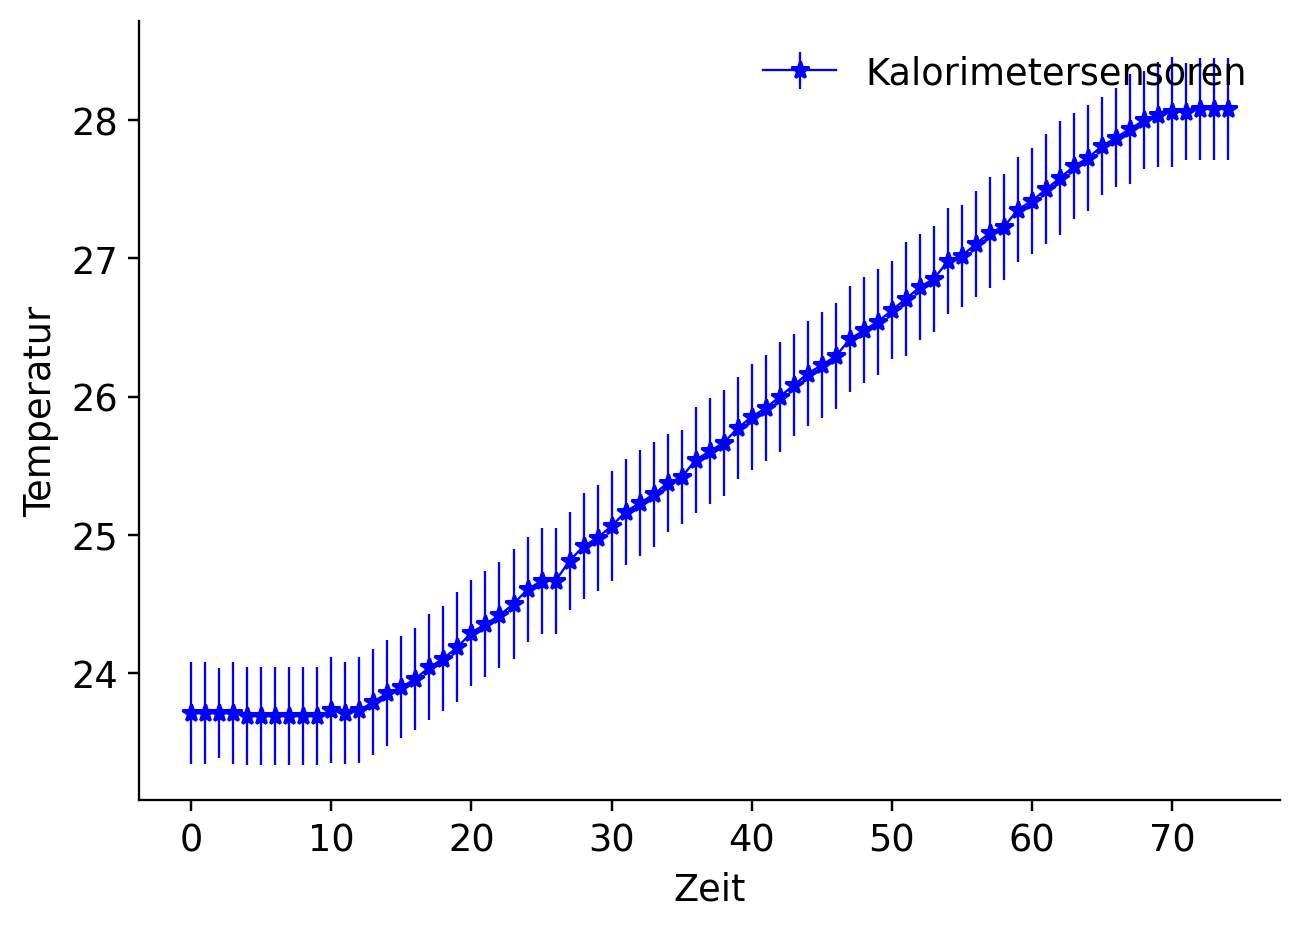

In [7]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

# Mittelwerte und Standardabweichungen auslesen
mean_values = mean_std_calorimeter[0]
std_dev_values = mean_std_calorimeter[1]

mean_std_calorimeter = [mean_values, std_dev_values]

# Graph plotten mit den Werten
plt.errorbar(range(len(mean_values)), mean_values, yerr=std_dev_values, fmt="b*-", label="Kalorimetersensoren")

# Graph beschriften
plt.xlabel("Zeit")
plt.ylabel("Temperatur")
plt.legend()

# Graph ausgeben
plt.show()

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [8]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

# Metadaten Pfad definieren
metadata_path_const = "data/Konstante/calorimeter_1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753.json"

# Metadaten auslesen
with open(metadata_path_const, "r") as file:
    metadata = json.load(file)

# Masse des Wassers auslesen
water_mass = metadata["calorimeter"]["medium"]["mass"]["value"]

# Wert ausgeben 
print("Wasssermasse", water_mass, "gramm")

# DONE #

Wasssermasse 400 gramm


In [9]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

dataset_names = ["current", "heat_time", "voltage"]

with h5.File(datafile_path_const, "r") as file:
    # Datensatznamen durchlaufen und entsprechenden Daten auslesen 
    for dataset_name in dataset_names:
        dataset_path_const = f"RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/{dataset_name}"
        
        # mit if-Schleife überprüfen ob der dataset Pfad existiert und ob es ein array oder ein scalar ist
        if dataset_path_const in file:
            if isinstance(file[dataset_path_const], h5.Dataset):
                globals()[dataset_name] = file[dataset_path_const][()]  
            
# Daten auslesen
print("Stromstärke [A]:", current)
print("Aufwärmzeit [s]", heat_time)
print("Spannung [V]:", voltage)
# DONE #

# DONE #

Stromstärke [A]: 4.0
Aufwärmzeit [s] 180.0
Spannung [V]: 12.5


#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [10]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
temperature_end, temperature_start = utility.get_start_end_temperature(mean_values) 

# Daten auslesen
print("Starttemperatur:", temperature_start)
print("Endtemperatur:", temperature_end)

# DONE #

Starttemperatur: 24.009672619047617
Endtemperatur: 27.548611111111114


#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [11]:
# TODO: Calculate heat capacity of the calorimeter

#Relevante Konstanten definieren
U = voltage             # in Volt
I = current             # in Ampere
delta_t = heat_time     # in Sekunden
T1 = temperature_start  # in Celsius
T2 = temperature_end    # in Celsius

# Kalorimeterkonstante berechnen
calorimeter_const = (U * I * delta_t) / (T2 - T1)

# DONE #

#### (Vii) Ergebnis

In [13]:
print("Kalorimeterkonstante:", calorimeter_const, "J°C")

Kalorimeterkonstante: 2543.135468498139 J°C


### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [14]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "data/Probe-002/Probe-002.h5"

# DONE #

In [15]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1,"RawData" )

# Temperaturen Daten auslesen
temperature_data = data_dict["temperature"]

# Zeitstempel Daten auslesen
timestamp_data = data_dict["timestamp"]

# Sensornamen auslesen 
sensor_names = data_dict["name"]

# Temperaturen Daten für die Sensoren auslesen
calorimeter_data = temperature_data[0:3, :]
env_data = temperature_data[3, :]
bath_data = temperature_data[4, :]

# Zeitstempel Daten für die Sensoren auslesen
calorimeter_timestamp = timestamp_data[0:3, :]
env_timestamp = timestamp_data[3, :]
bath_timestamp = timestamp_data[4, :]

# Daten auslesen
print("Kalorimeter Daten:")
print(calorimeter_data)
print("\nKalorimeter Zeitstempel:")
print(calorimeter_timestamp)

print("\nUmgebungsdaten:")
print(env_data)
print("\nUmgebungszeitstempel:")
print(env_timestamp)

print("\nWasserbad Daten:")
print(bath_data)
print("\nWasserbad Zeitstempel:")
print(bath_timestamp)

# DONE #

Kalorimeter Daten:
[[18.875  18.9375 18.9375 18.9375 18.875  18.9375 19.     18.9375 18.9375
  18.9375 19.625  21.125  22.5625 22.5625 24.8125 24.8125 26.0625 26.4375
  26.75   26.9375 27.125  27.25   27.375  27.375  27.4375 27.5    27.5
  27.5    27.5625 27.5625 27.5625 27.5625 27.5625 27.5625 27.5625 27.5625
  27.5625 27.5625 27.5625 27.5625 27.5    27.5    27.5    27.5625 27.5   ]
 [19.625  19.625  19.625  19.6875 19.625  19.6875 19.625  19.6875 19.6875
  19.6875 20.875  22.5    23.875  25.     25.875  26.5    27.     27.3125
  27.5625 27.8125 27.9375 28.0625 28.125  28.1875 28.1875 28.25   28.25
  28.3125 28.3125 28.3125 28.3125 28.3125 28.3125 28.3125 28.3125 28.3125
  28.3125 28.3125 28.25   28.3125 28.3125 28.3125 28.3125 28.25   28.25  ]
 [19.6875 19.6875 19.6875 19.6875 19.6875 19.6875 19.6875 19.6875 19.6875
  19.875  21.0625 22.625  24.     25.125  25.9375 26.625  27.0625 27.375
  27.375  27.8125 27.9375 28.0625 28.125  28.1875 28.25   28.25   28.3125
  28.3125 28.3125 28.31

In [16]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

setupfile_path_prob1 = "data/Probe-002/setup_PDC-002.json"

# Setupfile auslesen
with open(setupfile_path_prob1, "r") as file:
    setup_data = json.load(file)

# Index Listen erstellen
index_calorimeter = [counter for counter, (sensor_id, sensor_info) in enumerate(setup_data["setup"].items(), start=1)
                     if sensor_info["type"] == "sensor" and "calorimeter" in sensor_info["name"]]

index_environment = [counter for counter, (sensor_id, sensor_info) in enumerate(setup_data["setup"].items(), start=1)
                      if sensor_info["type"] == "sensor" and "environment" in sensor_info["name"]]

index_bath = [counter for counter, (sensor_id, sensor_info) in enumerate(setup_data["setup"].items(), start=1)
                      if sensor_info["type"] == "sensor" and "bath" in sensor_info["name"]]

# Auslesen der Listen
print("Kalorimeterindizes:", index_calorimeter)
print("Umgebungsindizes:", index_environment)
print("Wasserbadindizes:", index_bath)

# DONE #

Kalorimeterindizes: [5, 6, 7]
Umgebungsindizes: [8]
Wasserbadindizes: [9]


#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [17]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

# Berechnung der Mittelwerte und der Standardabweichungen
mean_std_calorimeter = utility.cal_mean_and_standard_deviation(calorimeter_data)
mean_std_environment = utility.cal_mean_and_standard_deviation(env_data)
mean_std_heater = utility.cal_mean_and_standard_deviation(bath_data)

# Ergebnisse ausgeben lassen
print("\nMittelwerte und Standardabweichungen für Kalorimetersensoren:")
print(mean_std_calorimeter)

print("\nMittelwerte und Standardabweichungen für Umgebungssensor:")
print(mean_std_environment)

print("\nMittelwerte und Standardabweichungen für Wasserbadsensoren:")
print(mean_std_heater)

# DONE #


Mittelwerte und Standardabweichungen für Kalorimetersensoren:
[[19.39583333 19.41666667 19.41666667 19.4375     19.39583333 19.4375
  19.4375     19.4375     19.4375     19.5        20.52083333 22.08333333
  23.47916667 24.22916667 25.54166667 25.97916667 26.70833333 27.04166667
  27.22916667 27.52083333 27.66666667 27.79166667 27.875      27.91666667
  27.95833333 28.         28.02083333 28.04166667 28.0625     28.0625
  28.08333333 28.0625     28.0625     28.0625     28.0625     28.0625
  28.0625     28.0625     28.04166667 28.0625     28.04166667 28.04166667
  28.02083333 28.02083333 28.        ]
 [ 0.36916761  0.33978138  0.33978138  0.35355339  0.36916761  0.35355339
   0.31040968  0.35355339  0.35355339  0.40504629  0.63805803  0.67956277
   0.65018694  1.17961564  0.51622965  0.82653477  0.45738538  0.42797164
   0.34736108  0.41247896  0.38301617  0.38301617  0.35355339  0.38301617
   0.36916761  0.35355339  0.36916761  0.38301617  0.35355339  0.35355339
   0.36916761  0.35355

#### (iii) Daten ploten

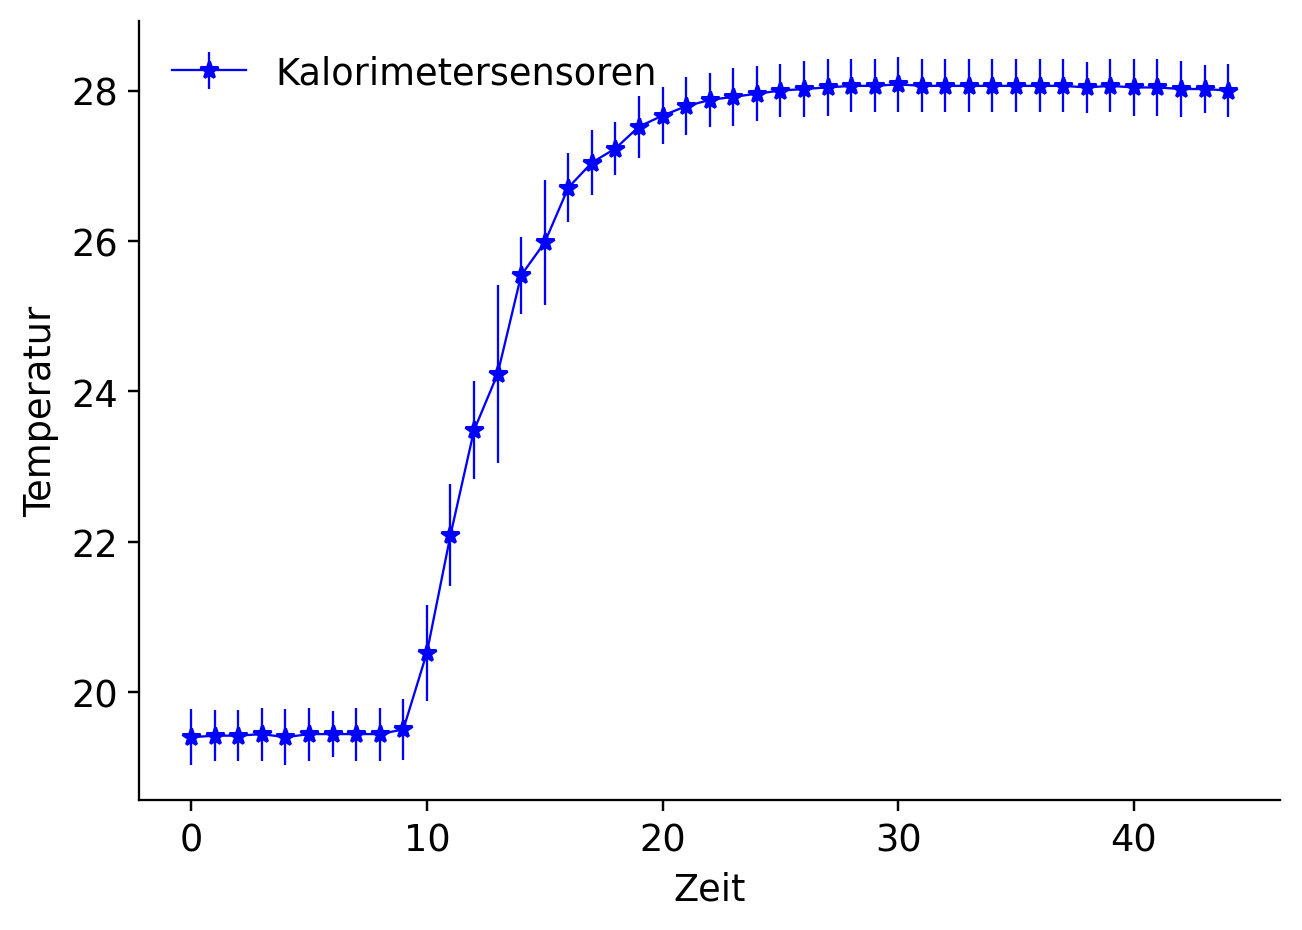

In [18]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

# Mittelwerte und Standardabweichungen auslesen
mean_values = mean_std_calorimeter[0]
std_dev_values = mean_std_calorimeter[1]

mean_std_calorimeter = [mean_values, std_dev_values]

# Graph plotten mit den Werten
plt.errorbar(range(len(mean_values)), mean_values, yerr=std_dev_values, fmt="b*-", label="Kalorimetersensoren")

# Graph beschriften
plt.xlabel("Zeit")
plt.ylabel("Temperatur")
plt.legend()

# Graph ausgeben
plt.show()

# DONE #

#### (iv) Metadaten auslesen

In [19]:
# TODO: Read mass of the sample from the metadata of the experiment.

# Metadaten Pfad definieren
metadata_path_prob1 = "data/Probe-002/probe_PDC002_1ee57b2d-d72d-6d50-b383-9f0e278e8f09.json"

# Metadaten auslesen
with open(metadata_path_prob1, "r") as file:
    metadata = json.load(file)

# Masse des Probe auslesen
sample_mass = metadata["probe"]["mass"]["value"]

# Wert ausgeben 
print("Probenmasse", sample_mass, "gramm")

# DONE #

Probenmasse 629 gramm


#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [20]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_values) 

# Daten auslesen
print("Starttemperatur des Wassers:", temperature_start_water)
print("Mixtemperatur am Ende :", temperature_mix)

# DONE #

Starttemperatur des Wassers: 19.43125
Mixtemperatur am Ende : 27.884339080459768


In [21]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

mean_values_first_10 = mean_std_calorimeter[0][:10]

# Mittelwert der ersten 10 Werten berechnen
temperature_start_sample = np.mean(mean_values_first_10)

# Wert ausgeben
print("Mittelwert (ersten 10 Werte) :", temperature_start_sample )

# DONE #

Mittelwert (ersten 10 Werte) : 19.43125


#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [22]:
# TODO: Calulate specific heat capacity of the sample.

# Relevante Konstanten definieren
C = calorimeter_const                 # in J/°C
T_M = temperature_start_sample        # in °C
mp = (water_mass/1000)                # in kg
T1 = temperature_start_water          # in °C
T2 = temperature_mix                  # in °C


# Spezifische Wärmekapazität berechnen
heat_capacity_spec = (C * (T_M - T1))/(mp * (T2 - T_M))

# DONE #

#### (Vii) Ergebnis

In [23]:
print("Spezifische Wärmekapazität: ", heat_capacity_spec, "J/kg°C")

Spezifische Wärmekapazität:  0.0 J/kg°C


### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [24]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = "data/Probe-015/Probe-015.h5"

# DONE #

In [25]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2,"RawData" )

# Temperaturen Daten auslesen
temperature_data = data_dict["temperature"]

# Zeitstempel Daten auslesen
timestamp_data = data_dict["timestamp"]

# Sensornamen auslesen 
sensor_names = data_dict["name"]

# Temperaturen Daten für die Sensoren auslesen
calorimeter_data = temperature_data[0:3, :]
env_data = temperature_data[3, :]
bath_data = temperature_data[4, :]

# Zeitstempel Daten für die Sensoren auslesen
calorimeter_timestamp = timestamp_data[0:3, :]
env_timestamp = timestamp_data[3, :]
bath_timestamp = timestamp_data[4, :]

# Daten auslesen
print("Kalorimeter Daten:")
print(calorimeter_data)
print("\nKalorimeter Zeitstempel:")
print(calorimeter_timestamp)

print("\nUmgebungsdaten:")
print(env_data)
print("\nUmgebungszeitstempel:")
print(env_timestamp)

print("\nWasserbad Daten:")
print(bath_data)
print("\nWasserbad Zeitstempel:")
print(bath_timestamp)

# DONE #

Kalorimeter Daten:
[[18.5625 18.5625 18.5625 18.5625 18.5625 18.5625 18.5625 18.5625 18.75
  20.0625 21.625  23.     23.9375 24.5625 25.0625 25.375  25.5625 25.75
  25.8125 25.875  25.9375 25.9375 25.9375 26.     26.     26.     26.
  26.     26.     26.    ]
 [19.25   19.3125 19.25   19.3125 19.3125 19.3125 19.3125 19.3125 19.875
  21.5625 23.0625 24.1875 25.0625 25.5625 26.     26.25   26.4375 26.5
  26.625  26.625  26.6875 26.75   26.75   26.75   26.75   26.75   26.75
  26.75   26.75   26.75  ]
 [28.25   19.3125 19.3125 19.3125 19.3125 19.3125 19.375  19.3125 20.0625
  21.625  23.1875 24.3125 25.125  25.625  26.     26.25   26.4375 26.5625
  26.625  26.6875 26.6875 26.75   26.75   26.75   26.75   26.75   26.75
  26.75   26.75   26.75  ]]

Kalorimeter Zeitstempel:
[[  0.81898594   4.85071564   8.85010433  12.85009575  16.88268614
   20.88210201  24.88268614  28.88270712  32.88214111  36.88274598
   40.88276696  44.88286233  48.8828361   52.9787631   57.01080394
   61.01016545  65.010

In [26]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

setupfile_path_prob2 = "data/Probe-015/setup_PDC-015.json"

# Setupfile auslesen
with open(setupfile_path_prob2, "r") as file:
    setup_data = json.load(file)

# Index Listen erstellen
index_calorimeter = [counter for counter, (sensor_id, sensor_info) in enumerate(setup_data["setup"].items(), start=1)
                     if sensor_info["type"] == "sensor" and "calorimeter" in sensor_info["name"]]

index_environment = [counter for counter, (sensor_id, sensor_info) in enumerate(setup_data["setup"].items(), start=1)
                      if sensor_info["type"] == "sensor" and "environment" in sensor_info["name"]]

index_bath = [counter for counter, (sensor_id, sensor_info) in enumerate(setup_data["setup"].items(), start=1)
                      if sensor_info["type"] == "sensor" and "bath" in sensor_info["name"]]

# Auslesen der Listen
print("Kalorimeterindizes:", index_calorimeter)
print("Umgebungsindizes:", index_environment)
print("Wasserbadindizes:", index_bath)

# DONE #

Kalorimeterindizes: [5, 6, 7]
Umgebungsindizes: [8]
Wasserbadindizes: [9]


#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [27]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

# Berechnung der Mittelwerte und der Standardabweichungen
mean_std_calorimeter = utility.cal_mean_and_standard_deviation(calorimeter_data)
mean_std_environment = utility.cal_mean_and_standard_deviation(env_data)
mean_std_heater = utility.cal_mean_and_standard_deviation(bath_data)

# Ergebnisse ausgeben lassen
print("\nMittelwerte und Standardabweichungen für Kalorimetersensoren:")
print(mean_std_calorimeter)

print("\nMittelwerte und Standardabweichungen für Umgebungssensor:")
print(mean_std_environment)

print("\nMittelwerte und Standardabweichungen für Wasserbadsensoren:")
print(mean_std_heater)

# DONE #


Mittelwerte und Standardabweichungen für Kalorimetersensoren:
[[22.02083333 19.0625     19.04166667 19.0625     19.0625     19.0625
  19.08333333 19.0625     19.5625     21.08333333 22.625      23.83333333
  24.70833333 25.25       25.6875     25.95833333 26.14583333 26.27083333
  26.35416667 26.39583333 26.4375     26.47916667 26.47916667 26.5
  26.5        26.5        26.5        26.5        26.5        26.5       ]
 [ 4.41361923  0.35355339  0.33978138  0.35355339  0.35355339  0.35355339
   0.36916761  0.35355339  0.57960116  0.72228899  0.70894581  0.59146123
   0.54565837  0.48680506  0.44194174  0.41247896  0.41247896  0.36916761
   0.38301617  0.36916761  0.35355339  0.38301617  0.38301617  0.35355339
   0.35355339  0.35355339  0.35355339  0.35355339  0.35355339  0.35355339]]

Mittelwerte und Standardabweichungen für Umgebungssensor:
[[22.39375  ]
 [ 0.0286411]]

Mittelwerte und Standardabweichungen für Wasserbadsensoren:
[[8.05770833e+01]
 [4.47310637e-02]]


#### (iii) Daten ploten

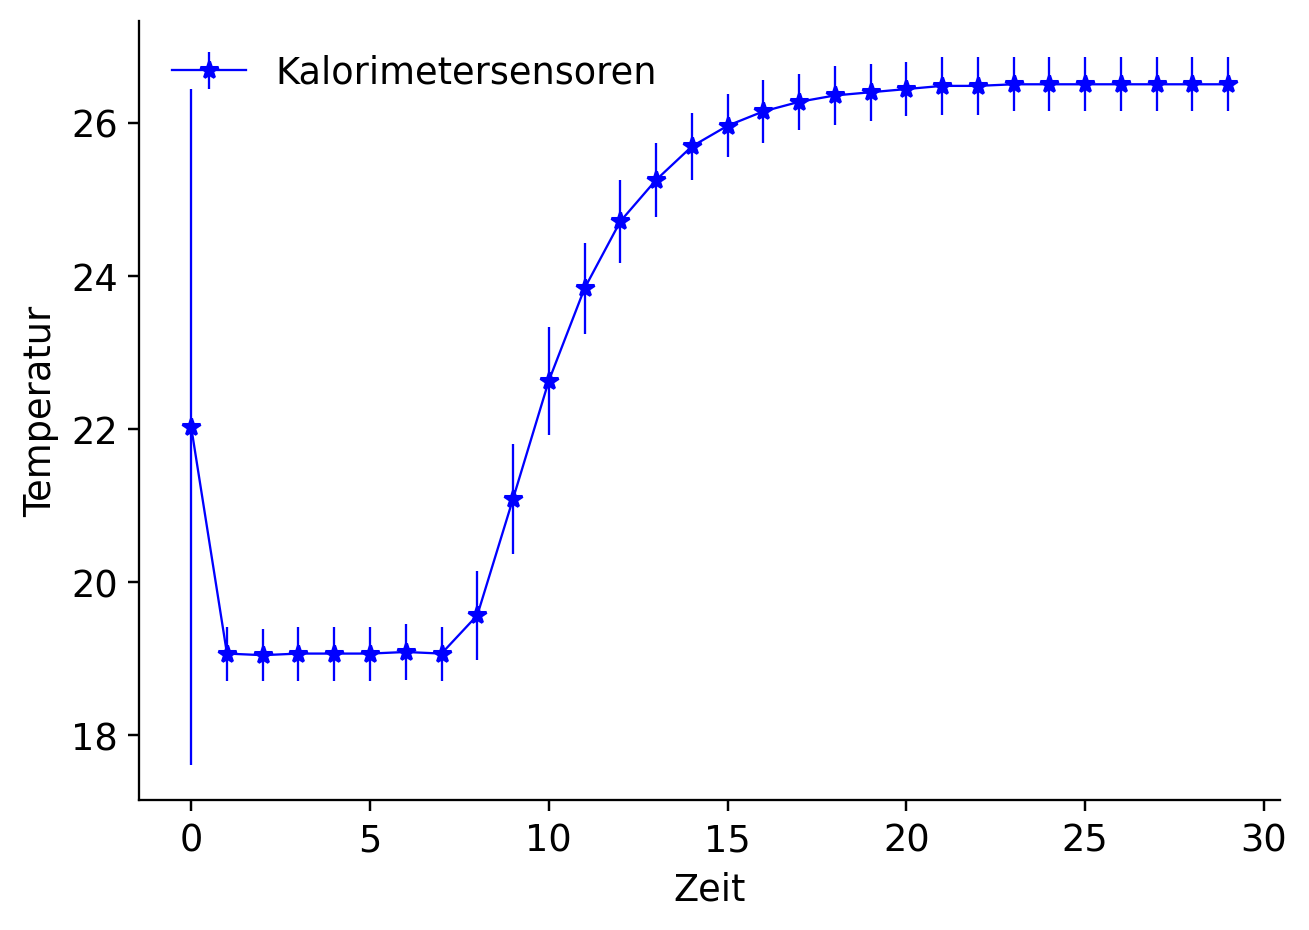

In [28]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

# Mittelwerte und Standardabweichungen auslesen
mean_values = mean_std_calorimeter[0]
std_dev_values = mean_std_calorimeter[1]

mean_std_calorimeter = [mean_values, std_dev_values]

# Graph plotten mit den Werten
plt.errorbar(range(len(mean_values)), mean_values, yerr=std_dev_values, fmt="b*-", label="Kalorimetersensoren")

# Graph beschriften
plt.xlabel("Zeit")
plt.ylabel("Temperatur")
plt.legend()

# Graph ausgeben
plt.show()

# DONE #

#### (iv) Metadaten auslesen

In [29]:
# TODO: Read mass of the sample from the metadata of the experiment.

# Metadaten Pfad definieren
metadata_path_prob2 = "data/Probe-015/probe_PDC015_1ee57b3b-1882-62e4-8374-424a3fe06b1b.json"

# Metadaten auslesen
with open(metadata_path_prob2, "r") as file:
    metadata = json.load(file)

# Masse des Probe auslesen
sample_mass = metadata["probe"]["mass"]["value"]

# Wert ausgeben 
print("Probenmasse", sample_mass, "gramm")

# DONE #

Probenmasse 678 gramm


#### (v) Anfangs- und Endwert der Temperatur

In [30]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_values) 

# Daten auslesen
print("Starttemperatur des Wassers:", temperature_start_water)
print("Mixtemperatur am Ende :", temperature_mix)

# DONE #

Starttemperatur des Wassers: 19.125
Mixtemperatur am Ende : 26.291666666666664


In [31]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

mean_values_first_10 = mean_std_calorimeter[0][:10]

# Mittelwert der ersten 10 Werten berechnen
temperature_start_sample = np.mean(mean_values_first_10)

# Wert ausgeben
print("Mittelwert (ersten 10 Werte) :", temperature_start_sample)

# DONE #

Mittelwert (ersten 10 Werte) : 19.610416666666666


#### (vi) spezifische Wärmekapazität bestimmen

In [32]:
# TODO: Calulate specific heat capacity of the sample.

# Relevante Konstanten definieren
C = calorimeter_const                 # in J/°C
T_M = temperature_start_sample        # in °C
mp = (water_mass/1000)                # in kg
T1 = temperature_start_water          # in °C
T2 = temperature_mix                  # in °C


# Spezifische Wärmekapazität berechnen
heat_capacity_spec = (C * (T_M - T1))/(mp * (T2 - T_M))

# DONE #

#### (Vii) Ergebnis

In [33]:
print("Spezifische Wärmekapazität:", heat_capacity_spec, "J/kg°C")

Spezifische Wärmekapazität: 461.9196789523428 J/kg°C


### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [34]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "data/Probe-025/Probe-025.h5"

# DONE #

In [35]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3,"RawData")

# Temperaturen Daten auslesen
temperature_data = data_dict["temperature"]

# Zeitstempel Daten auslesen
timestamp_data = data_dict["timestamp"]

# Sensornamen auslesen 
sensor_names = data_dict["name"]

# Temperaturen Daten für die Sensoren auslesen
calorimeter_data = temperature_data[0:3, :]
env_data = temperature_data[3, :]
bath_data = temperature_data[4, :]

# Zeitstempel Daten für die Sensoren auslesen
calorimeter_timestamp = timestamp_data[0:3, :]
env_timestamp = timestamp_data[3, :]
bath_timestamp = timestamp_data[4, :]

# Daten auslesen
print("Kalorimeter Daten:")
print(calorimeter_data)
print("\nKalorimeter Zeitstempel:")
print(calorimeter_timestamp)

print("\nUmgebungsdaten:")
print(env_data)
print("\nUmgebungszeitstempel:")
print(env_timestamp)

print("\nWasserbad Daten:")
print(bath_data)
print("\nWasserbad Zeitstempel:")
print(bath_timestamp)

# DONE #

Kalorimeter Daten:
[[18.6875 18.6875 18.6875 18.6875 18.6875 18.6875 18.6875 18.6875 18.6875
  18.875  19.1875 19.4375 19.75   19.9375 20.125  20.3125 20.5    20.5625
  20.6875 20.8125 20.8125 21.     21.125  21.25   21.3125 21.375  21.4375
  21.5    21.5625 21.625  21.6875 21.75   21.8125 21.875  21.875  21.9375
  21.9375 22.     22.     22.0625 22.0625 22.125  22.125  22.1875 22.1875
  22.25   22.25   22.25   22.3125 22.3125 22.375  22.375  22.375  22.375
  22.4375 22.4375 22.4375 22.4375 22.4375 22.5    22.5    22.5    22.5
  22.5625 22.5625 22.5625 22.5625 22.5625 22.5625 22.5625 22.5625]
 [19.4375 19.375  19.4375 19.4375 19.4375 19.4375 19.4375 19.4375 19.4375
  19.6875 20.     20.3125 20.5625 20.75   20.9375 21.0625 21.25   21.375
  21.5    21.625  21.625  21.8125 21.9375 22.     22.0625 22.125  22.25
  22.25   22.375  22.375  22.4375 22.4375 22.5625 22.625  22.625  22.6875
  22.6875 22.75   22.8125 22.8125 22.875  22.875  22.875  22.9375 22.9375
  22.9375 23.     23.     23.0625

In [36]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

setupfile_path_prob3 = "data/Probe-025/setup_PDC-025.json"

# Setupfile auslesen
with open(setupfile_path_prob3, "r") as file:
    setup_data = json.load(file)

# Index Listen erstellen
index_calorimeter = [counter for counter, (sensor_id, sensor_info) in enumerate(setup_data["setup"].items(), start=1)
                     if sensor_info["type"] == "sensor" and "calorimeter" in sensor_info["name"]]

index_environment = [counter for counter, (sensor_id, sensor_info) in enumerate(setup_data["setup"].items(), start=1)
                      if sensor_info["type"] == "sensor" and "environment" in sensor_info["name"]]

index_bath = [counter for counter, (sensor_id, sensor_info) in enumerate(setup_data["setup"].items(), start=1)
                      if sensor_info["type"] == "sensor" and "bath" in sensor_info["name"]]

# Auslesen der Listen
print("Kalorimeterindizes:", index_calorimeter)
print("Umgebungsindizes:", index_environment)
print("Wasserbadindizes:", index_bath)

# DONE #

Kalorimeterindizes: [5, 6, 7]
Umgebungsindizes: [8]
Wasserbadindizes: [9]


#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [37]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

# Berechnung der Mittelwerte und der Standardabweichungen
mean_std_calorimeter = utility.cal_mean_and_standard_deviation(calorimeter_data)
mean_std_environment = utility.cal_mean_and_standard_deviation(env_data)
mean_std_heater = utility.cal_mean_and_standard_deviation(bath_data)

# Ergebnisse ausgeben lassen
print("\nMittelwerte und Standardabweichungen für Kalorimetersensoren:")
print(mean_std_calorimeter)

print("\nMittelwerte und Standardabweichungen für Umgebungssensor:")
print(mean_std_environment)

print("\nMittelwerte und Standardabweichungen für Wasserbadsensoren:")
print(mean_std_heater)

# DONE #


Mittelwerte und Standardabweichungen für Kalorimetersensoren:
[[19.1875     19.16666667 19.1875     19.1875     19.1875     19.1875
  19.1875     19.1875     19.22916667 19.45833333 19.66666667 20.04166667
  20.29166667 20.5        20.6875     20.83333333 21.02083333 21.10416667
  21.22916667 21.35416667 21.375      21.54166667 21.66666667 21.75
  21.8125     21.89583333 21.95833333 22.02083333 22.10416667 22.14583333
  22.1875     22.22916667 22.3125     22.375      22.375      22.4375
  22.4375     22.5        22.54166667 22.5625     22.60416667 22.64583333
  22.64583333 22.6875     22.70833333 22.72916667 22.75       22.77083333
  22.8125     22.83333333 22.85416667 22.875      22.875      22.89583333
  22.9375     22.9375     22.9375     22.95833333 22.97916667 22.97916667
  23.         23.         23.02083333 23.04166667 23.04166667 23.0625
  23.0625     23.0625     23.0625     23.0625     23.10416667]
 [ 0.35355339  0.33978138  0.35355339  0.35355339  0.35355339  0.35355339
   0

#### (iii) Daten ploten

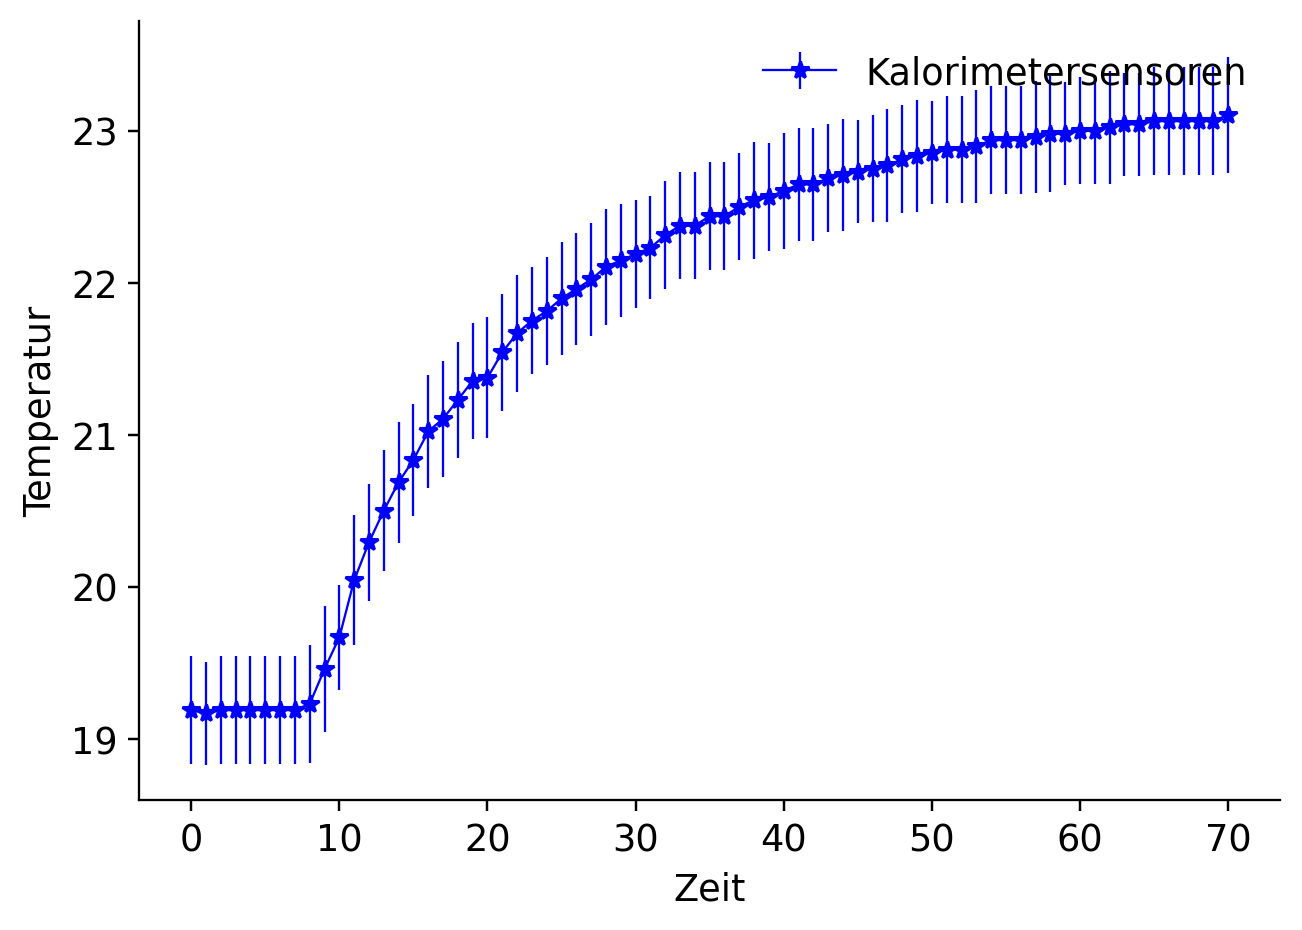

In [38]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

# Mittelwerte und Standardabweichungen auslesen
mean_values = mean_std_calorimeter[0]
std_dev_values = mean_std_calorimeter[1]

mean_std_calorimeter = [mean_values, std_dev_values]

# Graph plotten mit den Werten
plt.errorbar(range(len(mean_values)), mean_values, yerr=std_dev_values, fmt="b*-", label="Kalorimetersensoren")

# Graph beschriften
plt.xlabel("Zeit")
plt.ylabel("Temperatur")
plt.legend()

# Graph ausgeben
plt.show()

# DONE #

#### (iv) Metadaten auslesen

In [39]:
# TODO: Read mass of the sample from the metadata of the experiment.

# Metadaten Pfad definieren
metadata_path_prob3 = "data/Probe-025/probe_PDC025_1ee7d446-f66f-659b-997e-0db42fc92959.json"

# Metadaten auslesen
with open(metadata_path_prob3, "r") as file:
    metadata = json.load(file)

# Masse des Probe auslesen
sample_mass = metadata["probe"]["mass"]["value"]

# Wert ausgeben 
print("Probenmasse", sample_mass, "gramm")

# DONE #

Probenmasse 83 gramm


#### (v) Anfangs- und Endwert der Temperatur

In [40]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_values) 

# Daten auslesen
print("Starttemperatur des Wassers:", temperature_start_water)
print("Mixtemperatur am Ende :", temperature_mix)

# DONE #

Starttemperatur des Wassers: 19.322916666666668
Mixtemperatur am Ende : 22.713888888888885


In [41]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

mean_values_first_10 = mean_std_calorimeter[0][:10]

# Mittelwert der ersten 10 Werten berechnen
temperature_start_sample = np.mean(mean_values_first_10)

# Wert ausgeben
print("Mittelwert (ersten 10 Werte) :",temperature_start_sample )

# DONE #

Mittelwert (ersten 10 Werte) : 19.21666666666667


#### (vi) spezifische Wärmekapazität bestimmen

In [42]:
# TODO: Calulate specific heat capacity of the sample.

# Relevante Konstanten definieren
C = calorimeter_const                 # in J/°C
T_M = temperature_start_sample        # in °C
mp = (water_mass/1000)                # in kg
T1 = temperature_start_water          # in °C
T2 = temperature_mix                  # in °C


# Spezifische Wärmekapazität berechnen
heat_capacity_spec = (C * (T_M - T1))/(mp * (T2 - T_M))

# DONE #

#### (Vii) Ergebnis

In [43]:
print("Spezifische Wärmekapazität: ", heat_capacity_spec, "J/kg°C")

Spezifische Wärmekapazität:  -193.15911769271906 J/kg°C


## Diskussion
Wie man sieht sind die Ergebnisse der spezifischen Wärmekapazitäten der verschiedenen Proben sehr unterschiedlich. Also man kann sagen, dass die Wärmekapazität stark vom Material der Probe abhängt. Bei einem Wert kommt jedoch 0 raus und bei einem anderen eine negative Zahl, was nicht sein kann.

## Fazit
Der Laborversuch vor Ort hat sehr viel Spaß gemacht. Unser Code hat nicht funktioniert. so dass wir schnell den Backup Code gestellt bekommen haben, mit dem wir alles durchführen konnten. Bei kleinen Fehlern wurde uns immer geholfen, was sehr viel Zeit gespart hat an manchen Stellen. Die Daten hatten wir also nach dem Versuch und die utility.py war etwas schwerer wieder, wobei es mit viel python recherche auch ging. Die Ausarbeitung war auch okay. Die Praxis war natürlich das beste und mit dem Prüfstand zu arbeiten, den Verusch vorzubereiten und auszuwerten in der Gruppe zusammen.